# **TASK 1 : SENTIMENT ANALYSIS ON SOCIAL MEDIA DATA**


Build a sentiment analysis model to classify social media posts as positive, negative, or neutral.

*Steps:

1. Data Collection: Gather a dataset of social media posts with labeled sentiments.
2. Text Preprocessing: Clean and preprocess the text data by removing special characters, stopwords, and performing tokenization.
3. Feature Extraction: Convert the text data into numerical features using techniques like TF-IDF or word embeddings.
4. Model Selection: Choose a suitable classification algorithm such as Naive Bayes, Support Vector Machines, or a neural network.
7. Model Training: Train the selected model using the preprocessed data.
8. Model Evaluation: Evaluate the model's performance using metrics like accuracy, precision, recall, and F1-score.
9. Deployment: Create a simple web interface where users can input their own text for sentiment analysis.

###**Tech Stack:**

• Python
• Natural Language Processing libraries
• Machine Learning frameworks

#  Data Collection 

*Dataset : amazon_reviews.csv



In [13]:
import pandas as pd

df = pd.read_csv(r"C:\Users\peera\Downloads\amazon.csv")
df

Unnamed: 0  reviewerName  overall  \
0              0           NaN        4   
1              1          0mie        5   
2              2           1K3        4   
3              3           1m2        5   
4              4  2&amp;1/2Men        5   
...          ...           ...      ...   
4910        4910        ZM "J"        1   
4911        4911            Zo        5   
4912        4912     Z S Liske        5   
4913        4913      Z Taylor        5   
4914        4914           Zza        5   

                                             reviewText  reviewTime  day_diff  \
0                                            No issues.  23-07-2014       138   
1     Purchased this for my device, it worked as adv...  25-10-2013       409   
2     it works as expected. I should have sprung for...  23-12-2012       715   
3     This think has worked out great.Had a diff. br...  21-11-2013       382   
4     Bought it with Retail Packaging, arrived legit...  13-07-2013       513   
...                                                 ...         ...       ...   
4910  I bought this Sandisk 16GB Class 10 to use wit...  23-07-2013       503   
4911  Used this for extending the capabilities of my...  22-08-2013       473   
4912  Great card that is very fast and reliable. It ...  31-03-2014       252   
4913  Good amount of space for the stuff I want to d...  16-09-2013       448   
4914  I've heard bad things about this 64gb Micro SD...  01-02-2014       310   

      helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
0               0           0           0                   0   
1               0           0           0                   0   
2               0           0           0                   0   
3               0           0           0                   0   
4               0           0           0                   0   
...           ...         ...         ...                 ...   
4910            0           0           0                   0   
4911            0           0           0                   0   
4912            0           0           0                   0   
4913            0           0           0                   0   
4914            0           0           0                   0   

      score_average_rating  wilson_lower_bound  
0                      0.0                 0.0  
1                      0.0                 0.0  
2                      0.0                 0.0  
3                      0.0                 0.0  
4                      0.0                 0.0  
...                    ...                 ...  
4910                   0.0                 0.0  
4911                   0.0                 0.0  
4912                   0.0                 0.0  
4913                   0.0                 0.0  
4914                   0.0                 0.0  

[4915 rows x 12 columns]

#2. Text Preprocessing :

In [14]:
df.dtypes

Unnamed: 0                int64
reviewerName             object
overall                   int64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object

In [16]:
df = dataset.sort_values("wilson_lower_bound", ascending=False)
df.drop('Unnamed: 0', inplace=True, axis=1, errors='ignore')  # Ensure 'Unnamed: 0' is dropped even if it doesn't exist
df.head()

reviewerName  overall  \
2031     Hyoun Kim "Faluzure"        5   
3449        NLee the Engineer        5   
4212              SkincareCEO        1   
317   Amazon Customer "Kelly"        1   
4672                  Twister        5   

                                             reviewText  reviewTime  day_diff  \
2031     update               so my lovely wife boug...  05-01-2013       702   
3449  i have tested dozens of sdhc and micro sdhc ca...  26-09-2012       803   
4212  note   please read the last update  scroll to ...  08-05-2013       579   
317   if your card gets hot enough to be painful  it...  09-02-2012      1033   
4672  sandisk announcement of the first    gb micro ...  03-07-2014       158   

      helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
2031         1952          68        2020                1884   
3449         1428          77        1505                1351   
4212         1568         126        1694                1442   
317           422          73         495                 349   
4672           45           4          49                  41   

      score_average_rating  wilson_lower_bound  polarity  subjectivity  
2031              0.966337            0.957544  0.163859      0.562259  
3449              0.948837            0.936519  0.103870      0.516435  
4212              0.925620            0.912139  0.212251      0.505394  
317               0.852525            0.818577  0.143519      0.494207  
4672              0.918367            0.808109  0.172332      0.511282

In [17]:
df.reviewText.head()

2031       update               so my lovely wife boug...
3449    i have tested dozens of sdhc and micro sdhc ca...
4212    note   please read the last update  scroll to ...
317     if your card gets hot enough to be painful  it...
4672    sandisk announcement of the first    gb micro ...
Name: reviewText, dtype: object

In [18]:
sample_review = df.reviewText[4212]
sample_review

'note   please read the last update  scroll to the bottom    i m leaving this review as   star as it appears to help others who purchased and had a similar experience i give sandisk   stars for customer service and   star for the product  for those manufactured in the past   for those newly manufactured products that contain the software rom fix  i d give the product   stars to all those who purchased this card due to all the great reviews     and then used it in a galaxy s   gs   smartphone for storage  the solution to the problem is not one you can solve without returning the card to sandisk for a replacement under warranty   believe me i tried everything that the google searches returned as solutions    formatting as exfat  formatting in the gs  then copying data to the card while in the phone etc     nothing worked    and so now please stop pulling out your hair and hopefully you will get the same result which i hope to get soon  just rma d and will send it back tomorrow for a free

In [19]:
# we clean it from punctuation and numbers - using regex. {Regular expression}

import re

sample_review = re.sub("[^a-zA-Z]",' ',sample_review)
sample_review

'note   please read the last update  scroll to the bottom    i m leaving this review as   star as it appears to help others who purchased and had a similar experience i give sandisk   stars for customer service and   star for the product  for those manufactured in the past   for those newly manufactured products that contain the software rom fix  i d give the product   stars to all those who purchased this card due to all the great reviews     and then used it in a galaxy s   gs   smartphone for storage  the solution to the problem is not one you can solve without returning the card to sandisk for a replacement under warranty   believe me i tried everything that the google searches returned as solutions    formatting as exfat  formatting in the gs  then copying data to the card while in the phone etc     nothing worked    and so now please stop pulling out your hair and hopefully you will get the same result which i hope to get soon  just rma d and will send it back tomorrow for a free

In [20]:
sample_review = sample_review.lower().split()
sample_review

['note',
 'please',
 'read',
 'the',
 'last',
 'update',
 'scroll',
 'to',
 'the',
 'bottom',
 'i',
 'm',
 'leaving',
 'this',
 'review',
 'as',
 'star',
 'as',
 'it',
 'appears',
 'to',
 'help',
 'others',
 'who',
 'purchased',
 'and',
 'had',
 'a',
 'similar',
 'experience',
 'i',
 'give',
 'sandisk',
 'stars',
 'for',
 'customer',
 'service',
 'and',
 'star',
 'for',
 'the',
 'product',
 'for',
 'those',
 'manufactured',
 'in',
 'the',
 'past',
 'for',
 'those',
 'newly',
 'manufactured',
 'products',
 'that',
 'contain',
 'the',
 'software',
 'rom',
 'fix',
 'i',
 'd',
 'give',
 'the',
 'product',
 'stars',
 'to',
 'all',
 'those',
 'who',
 'purchased',
 'this',
 'card',
 'due',
 'to',
 'all',
 'the',
 'great',
 'reviews',
 'and',
 'then',
 'used',
 'it',
 'in',
 'a',
 'galaxy',
 's',
 'gs',
 'smartphone',
 'for',
 'storage',
 'the',
 'solution',
 'to',
 'the',
 'problem',
 'is',
 'not',
 'one',
 'you',
 'can',
 'solve',
 'without',
 'returning',
 'the',
 'card',
 'to',
 'sandisk',

In [22]:
rt = lambda x: re.sub("[^a-zA-Z]",' ',str(x))
df["reviewText"] = dataset["reviewText"].map(rt)
df["reviewText"] = dataset["reviewText"].str.lower()
df.head(10)

reviewerName  overall  \
2031         Hyoun Kim "Faluzure"        5   
3449            NLee the Engineer        5   
4212                  SkincareCEO        1   
317       Amazon Customer "Kelly"        1   
4672                      Twister        5   
1835                  goconfigure        5   
3981   R. Sutton, Jr. "RWSynergy"        5   
3807                   R. Heisler        3   
4306                Stellar Eller        5   
4596  Tom Henriksen "Doggy Diner"        1   

                                             reviewText  reviewTime  day_diff  \
2031     update               so my lovely wife boug...  05-01-2013       702   
3449  i have tested dozens of sdhc and micro sdhc ca...  26-09-2012       803   
4212  note   please read the last update  scroll to ...  08-05-2013       579   
317   if your card gets hot enough to be painful  it...  09-02-2012      1033   
4672  sandisk announcement of the first    gb micro ...  03-07-2014       158   
1835  bought from bestbuy online the day it was anno...  28-02-2014       283   
3981  the last few days i have been diligently shopp...  22-10-2012       777   
3807  i bought this card to replace a lost    gig in...  27-02-2013       649   
4306  while i got this card as a  deal of the day  o...  06-09-2012       823   
4596  hi i ordered two card and they arrived the nex...  22-09-2012       807   

      helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
2031         1952          68        2020                1884   
3449         1428          77        1505                1351   
4212         1568         126        1694                1442   
317           422          73         495                 349   
4672           45           4          49                  41   
1835           60           8          68                  52   
3981          112          27         139                  85   
3807           22           3          25                  19   
4306           51          14          65                  37   
4596           82          27         109                  55   

      score_average_rating  wilson_lower_bound  polarity  subjectivity  
2031              0.966337            0.957544  0.163859      0.562259  
3449              0.948837            0.936519  0.103870      0.516435  
4212              0.925620            0.912139  0.212251      0.505394  
317               0.852525            0.818577  0.143519      0.494207  
4672              0.918367            0.808109  0.172332      0.511282  
1835              0.882353            0.784651  0.386111      0.616667  
3981              0.805755            0.732136  0.070466      0.445756  
3807              0.880000            0.700442  0.194643      0.675000  
4306              0.784615            0.670334  0.217172      0.503535  
4596              0.752294            0.663595  0.088242      0.452143

In [26]:
import nltk
import pandas as pd
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download necessary NLTK data
nltk.download('vader_lexicon')

# Assuming df is your DataFrame containing the 'reviewText' column
# Create new columns for polarity and subjectivity using TextBlob
df[['polarity', 'subjectivity']] = df['reviewText'].apply(lambda text: pd.Series(TextBlob(text).sentiment))

# Initialize SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Analyze sentiment for each row and assign sentiment label
for index, row in df.iterrows():
    score = sid.polarity_scores(row['reviewText'])
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    if neg >= pos:
        df.loc[index, 'sentiment'] = "Negative"
    elif pos > neg:
        df.loc[index, 'sentiment'] = "Positive"
    else:
        df.loc[index, 'sentiment'] = "Neutral"

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\peera\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [28]:
# 20 Identifying the interpretation, now we can include the positive, negative and neutral status of the comments.

df[df["sentiment"] == "Positive"].sort_values("wilson_lower_bound", ascending=False).head(5)

reviewerName  overall  \
2031     Hyoun Kim "Faluzure"        5   
3449        NLee the Engineer        5   
4212              SkincareCEO        1   
317   Amazon Customer "Kelly"        1   
4672                  Twister        5   

                                             reviewText  reviewTime  day_diff  \
2031     update               so my lovely wife boug...  05-01-2013       702   
3449  i have tested dozens of sdhc and micro sdhc ca...  26-09-2012       803   
4212  note   please read the last update  scroll to ...  08-05-2013       579   
317   if your card gets hot enough to be painful  it...  09-02-2012      1033   
4672  sandisk announcement of the first    gb micro ...  03-07-2014       158   

      helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
2031         1952          68        2020                1884   
3449         1428          77        1505                1351   
4212         1568         126        1694                1442   
317           422          73         495                 349   
4672           45           4          49                  41   

      score_average_rating  wilson_lower_bound  polarity  subjectivity  \
2031              0.966337            0.957544  0.163859      0.562259   
3449              0.948837            0.936519  0.103870      0.516435   
4212              0.925620            0.912139  0.212251      0.505394   
317               0.852525            0.818577  0.143519      0.494207   
4672              0.918367            0.808109  0.172332      0.511282   

     sentiment  
2031  Positive  
3449  Positive  
4212  Positive  
317   Positive  
4672  Positive

In [29]:
# Let's see if we have an unbalanced data problem

import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

def categorical_variable_summary(df, column_name):
    fig = make_subplots(rows=1,cols=2,
                        subplot_titles=('Countplot','Percentages'),
                        specs=[[{"type": "xy"}, {'type':'domain'}]])

    fig.add_trace(go.Bar( y = df[column_name].value_counts().values.tolist(),
                          x = [str(i) for i in df[column_name].value_counts().index],
                          text = df[column_name].value_counts().values.tolist(),
                          textfont = dict(size=15),
                          name = column_name,
                          textposition = 'auto',
                          showlegend=False,
                          marker=dict(color = ['#581845','#C70039','#2E4053','#1ABC9C','#7F8C8D'],
                                      line=dict(color='#DBE6EC',
                                                width=1))),
                  row = 1, col = 1)

    fig.add_trace(go.Pie(labels= df[column_name].value_counts().keys(),
                         values= df[column_name].value_counts().values,
                         textfont = dict(size = 20),
                         textposition='auto',
                         showlegend = False,
                         name = column_name,
                         marker=dict(colors=['#581845','#C70039','#2E4053','#1ABC9C','#7F8C8D'])),
                  row = 1, col = 2)

    fig.update_layout(title={'text': column_name,
                             'y':0.9,
                             'x':0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)

In [30]:
categorical_variable_summary(df,'overall')

In [32]:
categorical_variable_summary(df,'sentiment')

# Feature Extraction :


In [33]:
def sentiment(label):
    if label == 5.0 or label == 4.0:
        return "Positive"
    elif label == 3.0:
        return "Neutral"
    elif label == 1.0 or label == 2.0:
        return "Negative"

In [35]:
df['overall'] = dataset["overall"].apply(sentiment)

<Axes: xlabel='overall'>

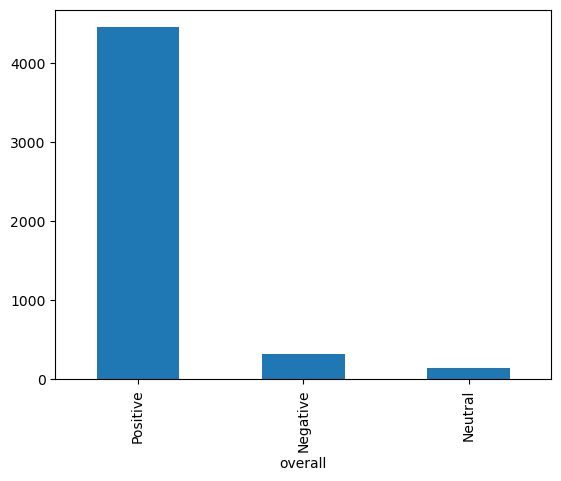

In [36]:
df.overall.value_counts().plot(kind = "bar")

In [38]:
pos_comments = df[dataset.overall == 'Positive']
pos_comments.head()

C:\Users\peera\AppData\Local\Temp\ipykernel_25588\3982299244.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Empty DataFrame
Columns: [reviewerName, overall, reviewText, reviewTime, day_diff, helpful_yes, helpful_no, total_vote, score_pos_neg_diff, score_average_rating, wilson_lower_bound, polarity, subjectivity, sentiment]
Index: []

In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Check if the 'reviewText' column contains any non-empty text
if not pos_comments['reviewText'].empty:
    text = ' '.join([str(word) for word in pos_comments['reviewText']])
    plt.figure(figsize=(15, 15), facecolor='None')
    wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Most frequent words in positive comments', fontsize=19)
    plt.show()
else:
    print("No text found in the 'reviewText' column of pos_comments DataFrame.")




No text found in the 'reviewText' column of pos_comments DataFrame.


In [42]:
neu_comments = df[df.overall == 'Neutral']
neu_comments.head()

reviewerName  overall  \
3807                     R. Heisler  Neutral   
1910                  H. Al-Harethi  Neutral   
3820  richard c maxwell "R Maxwell"  Neutral   
4727                       villapoo  Neutral   
3622                   Phillip Lyle  Neutral   

                                             reviewText  reviewTime  day_diff  \
3807  i bought this card to replace a lost    gig in...  27-02-2013       649   
1910  i purchased this card on a daily lighting deal...  31-10-2012       768   
3820  i trusted this company but they only warranty ...  15-03-2013       633   
4727  bought this for samsung galaxy s  in fall     ...  13-05-2013       574   
3622  there is a known issue with a batch of these c...  28-03-2013       620   

      helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
3807           22           3          25                  19   
1910            5           2           7                   3   
3820            2           0           2                   2   
4727            2           0           2                   2   
3622            3           1           4                   2   

      score_average_rating  wilson_lower_bound  polarity  subjectivity  \
3807              0.880000            0.700442  0.194643      0.675000   
1910              0.714286            0.358934  0.053206      0.328482   
3820              1.000000            0.342380 -0.090000      0.455556   
4727              1.000000            0.342380  0.273333      0.478333   
3622              0.750000            0.300642 -0.075000      0.225000   

     sentiment  
3807  Negative  
1910  Positive  
3820  Positive  
4727  Positive  
3622  Negative

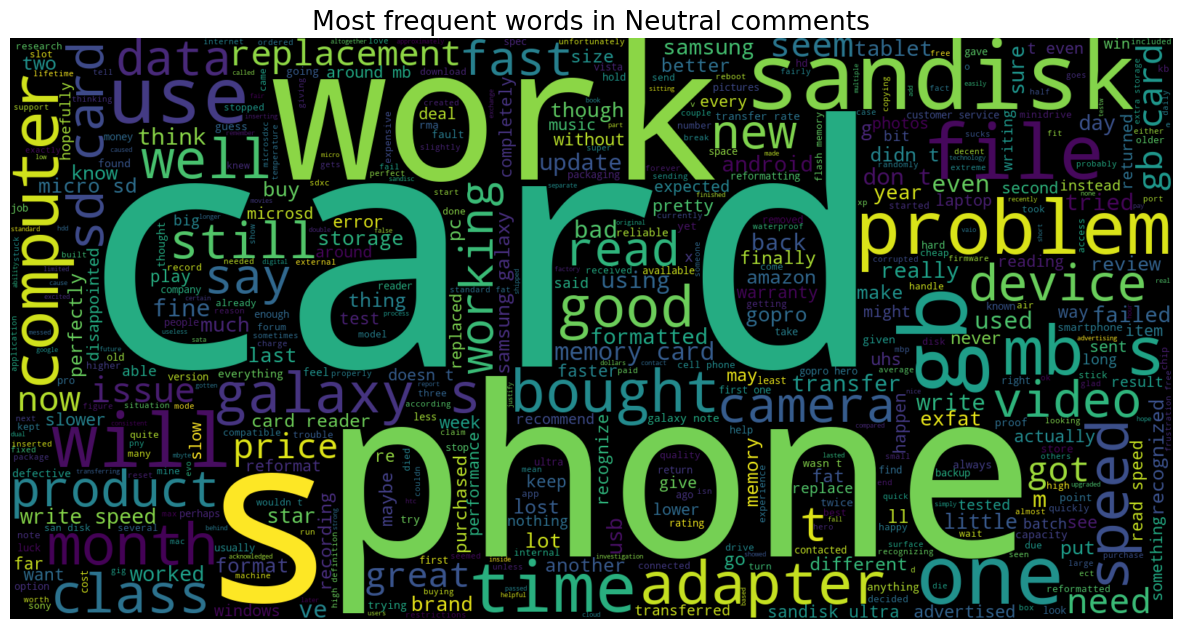

In [43]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = ' '.join([word for word in neu_comments['reviewText']])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Neutral comments', fontsize=19)
plt.show()

In [45]:
neg_comments = df[df.overall == 'Negative']
neg_comments.head()

reviewerName   overall  \
4212                  SkincareCEO  Negative   
317       Amazon Customer "Kelly"  Negative   
4596  Tom Henriksen "Doggy Diner"  Negative   
1596                  Erik Fisher  Negative   
3587                  pepper45322  Negative   

                                             reviewText  reviewTime  day_diff  \
4212  note   please read the last update  scroll to ...  08-05-2013       579   
317   if your card gets hot enough to be painful  it...  09-02-2012      1033   
4596  hi i ordered two card and they arrived the nex...  22-09-2012       807   
1596  not ok with gopro hero    black edition  the s...  29-11-2013       374   
3587  thank god for amazon return policy or i would ...  29-12-2012       709   

      helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
4212         1568         126        1694                1442   
317           422          73         495                 349   
4596           82          27         109                  55   
1596            3           0           3                   3   
3587            6           2           8                   4   

      score_average_rating  wilson_lower_bound  polarity  subjectivity  \
4212              0.925620            0.912139  0.212251      0.505394   
317               0.852525            0.818577  0.143519      0.494207   
4596              0.752294            0.663595  0.088242      0.452143   
1596              1.000000            0.438503 -0.135417      0.327083   
3587              0.750000            0.409275  0.034722      0.447222   

     sentiment  
4212  Positive  
317   Positive  
4596  Positive  
1596  Negative  
3587  Negative

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = ' '.join([word for word in neg_comments['reviewText']])
plt.figure(figsize=(10, 15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Negative comments', fontsize=19)
plt.show()

NameError: name 'neg_comments' is not defined

In [47]:
# Create Lables
    
    
from sklearn.preprocessing import LabelEncoder

def create_label(dataset, dependent_var, independent_var):
  sia = SentimentIntensityAnalyzer()
  dataset[independent_var] = dataset[dependent_var].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
  dataset[independent_var] = LabelEncoder().fit_transform(dataset[independent_var])

  X = dataset[dependent_var]
  y = dataset[independent_var]

  return X, y

In [48]:
X, y = create_label(dataset, "reviewText", "sentiment_label")


# . Model Selection

*   Logistic Regression
*   Random Forest

#  Model Training

In [49]:
# Split Dataset

from sklearn.model_selection import train_test_split, cross_val_score

def split_dataset(dataframe, X, y):
  train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=1)
  return train_x, test_x, train_y, test_y

In [51]:
from sklearn.model_selection import train_test_split

# Assuming X contains the features and y contains the target variable
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def create_features_count(train_x, test_x):
  # Count Vectors
  vectorizer = CountVectorizer()
  x_train_count_vectorizer = vectorizer.fit_transform(train_x)
  x_test_count_vectorizer = vectorizer.fit_transform(test_x)

  return x_train_count_vectorizer, x_test_count_vectorizer

In [53]:
x_train_count_vectorizer, x_test_count_vectorizer = create_features_count(train_x, test_x)

In [54]:
def create_features_TFIDF_word(train_x, test_x):
  # TF-IDF word
  tf_idf_word_vectorizer = TfidfVectorizer()
  x_train_tf_idf_word = tf_idf_word_vectorizer.fit_transform(train_x)
  x_test_tf_idf_word = tf_idf_word_vectorizer.fit_transform(test_x)

  return x_train_tf_idf_word, x_test_tf_idf_word

In [55]:
x_train_tf_idf_word, x_test_tf_idf_word = create_features_TFIDF_word(train_x, test_x)

# . Model Evaluation

### **Logistic Regression**

In [56]:
from sklearn.linear_model import LogisticRegression

def crate_model_logistic(train_x, test_x):
  # Count
  x_train_count_vectorizer, x_test_count_vectorizer = create_features_count(train_x, test_x)
  loj_count = LogisticRegression(solver='lbfgs', max_iter=1000)
  loj_model_count = loj_count.fit(x_train_count_vectorizer, train_y)
  accuracy_count = cross_val_score(loj_model_count, x_test_count_vectorizer, test_y, cv=10).mean()
  print("Accuracy - Count Vectors: %.3f" % accuracy_count)

  # TF-IDF Word
  x_train_tf_idf_word, x_test_tf_idf_word = create_features_TFIDF_word(train_x, test_x)
  loj_word = LogisticRegression(solver='lbfgs', max_iter=1000)
  loj_model_word = loj_word.fit(x_train_tf_idf_word, train_y)
  accuracy_word = cross_val_score(loj_model_word, x_test_tf_idf_word, test_y, cv=10).mean()
  print("Accuracy - TF-IDF Word: %.3f" % accuracy_word)

  return loj_model_count, loj_model_word

In [57]:
loj_model_count, loj_model_word = crate_model_logistic(train_x, test_x)

Accuracy - Count Vectors: 0.798
Accuracy - TF-IDF Word: 0.788


### **Random Forest**

In [58]:
from sklearn.ensemble import RandomForestClassifier

def crate_model_randomforest(train_x, test_x):
  # Count
  x_train_count_vectorizer, x_test_count_vectorizer = create_features_count(train_x, test_x)
  rf_count = RandomForestClassifier()
  rf_model_count = rf_count.fit(x_train_count_vectorizer, train_y)
  accuracy_count = cross_val_score(rf_model_count, x_test_count_vectorizer, test_y, cv=10).mean()
  print("Accuracy - Count Vectors: %.3f" % accuracy_count)

  # TF-IDF Word
  x_train_tf_idf_word, x_test_tf_idf_word = create_features_TFIDF_word(train_x, test_x)
  rf_word = RandomForestClassifier()
  rf_model_word = rf_word.fit(x_train_tf_idf_word, train_y)
  accuracy_word = cross_val_score(rf_model_word, x_test_tf_idf_word, test_y, cv=10).mean()
  print("Accuracy - TF-IDF Word: %.3f" % accuracy_word)

  return rf_model_count, rf_model_word

In [59]:
rf_model_count, rf_model_word = crate_model_randomforest(train_x, test_x)

Accuracy - Count Vectors: 0.789
Accuracy - TF-IDF Word: 0.786


# . Deployment :

In [61]:
def predict_count(train_x, model, new_comment):
  new_comment = pd.Series(new_comment)
  new_comment = CountVectorizer().fit(train_x).transform(new_comment)
  result = model.predict(new_comment)
  if result==1:
    print("Comment is Positive")
 else:
    print("Comment is Negative")

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 7)

In [ ]:
# Logistic Regression

predict_count(train_x, model=loj_model_count, new_comment="this product is very good :)")

In [ ]:
# Random Forest

predict_count(train_x, model=rf_model_count, new_comment="this product is very bad :)")

In [ ]:
# Sample Review

new_comment=pd.Series(dataset["reviewText"].sample(1).values)
new_comment

In [ ]:
# Sample Review - Random Forest

predict_count(train_x, model=rf_model_count, new_comment=new_comment)